In [1]:
# Check the tensorflow version

import tensorflow as tf
tf.__version__

'2.9.1'

In [8]:
!pip install -U git+https://github.com/albu/albumentations       
    

  Cloning https://github.com/albu/albumentations to c:\users\ghost\appdata\local\temp\pip-req-build-bj3_dwsu
  Resolved https://github.com/albu/albumentations to commit 9b0525f479509195a7a7b7c19311d8e63bbc6494
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/albu/albumentations 'C:\Users\ghost\AppData\Local\Temp\pip-req-build-bj3_dwsu'


In [8]:
pip install -U albumentations --user

Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install torchvision

     ---------------------------------------- 1.2/1.2 MB 2.2 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import os

import cv2

import albumentations as albu
from albumentations import Compose, ShiftScaleRotate, Resize


In [2]:
from albumentations.pytorch import ToTensorV2


from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report

import shutil

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224
IMAGE_CHANNELS = 3

In [4]:
imgs='C:/mges/'

In [5]:
os.listdir(imgs)

['Blast', 'Brown', 'data', 'Healthy']

In [8]:
Blast_dir='C:/mges/Blast/'
os.listdir(Blast_dir)

['id_004wknd7qd.jpg',
 'id_004wknd7qd_rgn.jpg',
 'id_00stp9t6m6.jpg',
 'id_00stp9t6m6_rgn.jpg',
 'id_012zxewnhx.jpg',
 'id_012zxewnhx_rgn.jpg',
 'id_01z6i8am9b.jpg',
 'id_01z6i8am9b_rgn.jpg',
 'id_02lw7skww5.jpg',
 'id_02lw7skww5_rgn.jpg',
 'id_02olqz4tf5.jpg',
 'id_02olqz4tf5_rgn.jpg',
 'id_04lhl9cypv.jpg',
 'id_04lhl9cypv_rgn.jpg',
 'id_06lh8r7g0p.jpg',
 'id_06lh8r7g0p_rgn.jpg',
 'id_06nrnxmqfw.jpg',
 'id_06nrnxmqfw_rgn.jpg',
 'id_06ya2x9n2i.jpg',
 'id_06ya2x9n2i_rgn.jpg',
 'id_08of6gx23n.jpg',
 'id_08of6gx23n_rgn.jpg',
 'id_0b9myv7d84.jpg',
 'id_0b9myv7d84_rgn.jpg',
 'id_0c29p9v7sv.jpg',
 'id_0c29p9v7sv_rgn.jpg',
 'id_0d6zji749f.jpg',
 'id_0d6zji749f_rgn.jpg',
 'id_0e3fpywz1c.jpg',
 'id_0e3fpywz1c_rgn.jpg',
 'id_0elx409mfe.jpg',
 'id_0elx409mfe_rgn.jpg',
 'id_0ez1rb5d66.jpg',
 'id_0ez1rb5d66_rgn.jpg',
 'id_0fq83cw58m.jpg',
 'id_0fq83cw58m_rgn.jpg',
 'id_0hyxh5b0u4.jpg',
 'id_0hyxh5b0u4_rgn.jpg',
 'id_0jpbgzxzqn.jpg',
 'id_0jpbgzxzqn_rgn.jpg',
 'id_0l62hcuzm1.jpg',
 'id_0l62hcuzm1_rg

In [9]:
Brown_dir='C:/mges/Brown/'
os.listdir(Brown_dir)

['id_005sitfgr2.jpg',
 'id_005sitfgr2_rgn.jpg',
 'id_01vb9vty05.jpg',
 'id_01vb9vty05_rgn.jpg',
 'id_03878to61t.jpg',
 'id_03878to61t_rgn.jpg',
 'id_04alcsykf1.jpg',
 'id_04alcsykf1_rgn.jpg',
 'id_09sjnce7rh.jpg',
 'id_09sjnce7rh_rgn.jpg',
 'id_0b3wfufkrn.jpg',
 'id_0b3wfufkrn_rgn.jpg',
 'id_0brsi9wkxu.jpg',
 'id_0brsi9wkxu_rgn.jpg',
 'id_0ch8257gec.jpg',
 'id_0ch8257gec_rgn.jpg',
 'id_0d2iguix1u.jpg',
 'id_0d2iguix1u_rgn.jpg',
 'id_0e0h5rmcrc.jpg',
 'id_0e0h5rmcrc_rgn.jpg',
 'id_0e1ftfk5dn.jpg',
 'id_0e1ftfk5dn_rgn.jpg',
 'id_0hekyy5bpe.jpg',
 'id_0hekyy5bpe_rgn.jpg',
 'id_0iedaup7qi.jpg',
 'id_0iedaup7qi_rgn.jpg',
 'id_0jbcvl994p.jpg',
 'id_0jbcvl994p_rgn.jpg',
 'id_0jkkhi50wx.jpg',
 'id_0jkkhi50wx_rgn.jpg',
 'id_0jyq9bzwk7.jpg',
 'id_0jyq9bzwk7_rgn.jpg',
 'id_0l8i75umhc.jpg',
 'id_0l8i75umhc_rgn.jpg',
 'id_0mw1rk52n5.jpg',
 'id_0mw1rk52n5_rgn.jpg',
 'id_0nnu7uivc9.jpg',
 'id_0nnu7uivc9_rgn.jpg',
 'id_0r3pohuvp7.jpg',
 'id_0r3pohuvp7_rgn.jpg',
 'id_0sil0chxq2.jpg',
 'id_0sil0chxq2_rg

In [10]:
Healthy_dir='C:/mges/Healthy/'
os.listdir(Healthy_dir)

['id_0186qwq2at.jpg',
 'id_0186qwq2at_rgn.jpg',
 'id_05udbcy9yj.jpg',
 'id_05udbcy9yj_rgn.jpg',
 'id_08rn3cmwlk.jpg',
 'id_08rn3cmwlk_rgn.jpg',
 'id_0iq6qeyl1w.jpg',
 'id_0iq6qeyl1w_rgn.jpg',
 'id_0j77fcidk8.jpg',
 'id_0j77fcidk8_rgn.jpg',
 'id_0jy0churxc.jpg',
 'id_0jy0churxc_rgn.jpg',
 'id_0mpknci13k.jpg',
 'id_0mpknci13k_rgn.jpg',
 'id_0s75euu5br.jpg',
 'id_0s75euu5br_rgn.jpg',
 'id_0w5lkubqj2.jpg',
 'id_0w5lkubqj2_rgn.jpg',
 'id_0whs0xzbfq.jpg',
 'id_0whs0xzbfq_rgn.jpg',
 'id_0xfe72a7zl.jpg',
 'id_0xfe72a7zl_rgn.jpg',
 'id_1365fwc0kk.jpg',
 'id_1365fwc0kk_rgn.jpg',
 'id_15ibjudhde.jpg',
 'id_15ibjudhde_rgn.jpg',
 'id_19xbegen3i.jpg',
 'id_19xbegen3i_rgn.jpg',
 'id_1eudnz8cyx.jpg',
 'id_1eudnz8cyx_rgn.jpg',
 'id_1iroyk2lnl.jpg',
 'id_1iroyk2lnl_rgn.jpg',
 'id_1luj2jnngl.jpg',
 'id_1luj2jnngl_rgn.jpg',
 'id_1m8fs2hvuh.jpg',
 'id_1m8fs2hvuh_rgn.jpg',
 'id_1modeyq8pw.jpg',
 'id_1modeyq8pw_rgn.jpg',
 'id_1ns81wb219.jpg',
 'id_1ns81wb219_rgn.jpg',
 'id_1ouwf7kqz8.jpg',
 'id_1ouwf7kqz8_rg

In [11]:
Blast_list = \
os.listdir('C:/mges/Blast/')
Brown_list = \
os.listdir('C:/mges/Brown/')
Healthy_list = \
os.listdir('C:/mges/Healthy/')

print(len(Blast_list))
print(len(Brown_list))
print(len(Healthy_list))

2988
1532
820


In [12]:
# Create the train and val sets

df_Blast = pd.DataFrame(Blast_list, columns=['image'])
df_Blast['target'] = 'Blast'

df_Brown = pd.DataFrame(Brown_list, columns=['image'])
df_Brown['target'] = 'Brown'

df_Healthy = pd.DataFrame(Healthy_list, columns=['image'])
df_Healthy['target'] = 'Healthy'


# Create a val set for each class

# Sample 5 validation images from each class
df_Blast_val = df_Blast.sample(n=2688, random_state=101)
df_Brown_val = df_Brown.sample(n=1387, random_state=101)
df_Healthy_val = df_Healthy.sample(n=750, random_state=101)


print(len(df_Blast_val))
print(len(df_Brown_val))
print(len(df_Healthy_val))

2688
1387
750


In [13]:
# Create the train set for each class

# Blast
# get a list of val images
val_list = list(df_Blast_val['image'])
# filter out the val images
df_Blast_train = df_Blast[~df_Blast['image'].isin(val_list)] # ~ means notin

# brown_spot
# get a list of val images
val_list = list(df_Brown_val['image'])
# filter out the val images
df_Brown_train = df_Brown[~df_Brown['image'].isin(val_list)] # ~ means notin

# bacterial_leaf_blight
# get a list of val images
val_list = list(df_Healthy_val['image'])
# filter out the val images
df_Healthy_train = \
df_Healthy[~df_Healthy['image'].isin(val_list)] # ~ means notin



print(len(df_Blast_train))
print(len(df_Brown_train))
print(len(df_Healthy_train))

300
145
70


In [14]:
# Create df_data, df_train and df_val

df_data = pd.concat([df_Blast,df_Brown, df_Healthy], axis=0).reset_index(drop=True)

df_train = \
pd.concat([df_Blast_train,df_Brown_train, df_Healthy_train], axis=0).reset_index(drop=True)

df_val = \
pd.concat([df_Blast_val,df_Brown_val, df_Healthy_val], axis=0).reset_index(drop=True)

df_data = shuffle(df_data)
df_train = shuffle(df_train)
df_val = shuffle(df_val)

print(df_data.shape)
print(df_train.shape)
print(df_val.shape)

(5340, 2)
(515, 2)
(4825, 2)


In [15]:
df_data['target'].value_counts()

Blast      2988
Brown      1532
Healthy     820
Name: target, dtype: int64

In [16]:
df_train['target'].value_counts()

Blast      300
Brown      145
Healthy     70
Name: target, dtype: int64

In [17]:
df_val['target'].value_counts()

Blast      2688
Brown      1387
Healthy     750
Name: target, dtype: int64

### Transform the target 

Here we will one hot encode the target classes.

In [18]:
# Create the target as index values

# combine val, train and test
val_len = len(df_val)
train_len = len(df_train)
df_combined =  pd.concat(objs=[df_val, df_train], axis=0).reset_index(drop=True)

# create the dummy variables
df_combined = pd.get_dummies(df_combined, columns=['target'])

# separate the train and val sets
df_val = df_combined[:val_len]
df_train = df_combined[val_len:]


print(df_train.shape)
print(df_val.shape)

(515, 4)
(4825, 4)


In [19]:
df_combined.head()

,image,target_Blast,target_Brown,target_Healthy
0,id_lxouv9si6d_rgn.jpg,1,0,0
1,id_zf10hw45ng_rgn.jpg,1,0,0
2,id_k7h838t0nk_rgn.jpg,0,1,0
3,id_0elx409mfe.jpg,1,0,0
4,id_0rd5eo3nlk_rgn.jpg,1,0,0


In [20]:
df_train.head()

,image,target_Blast,target_Brown,target_Healthy
4825,id_mjco867nck.jpg,1,0,0
4826,id_ot7lhlr1k0_rgn.jpg,0,0,1
4827,id_dfiek5snzm_rgn.jpg,1,0,0
4828,id_jn29sq5u2r.jpg,0,1,0
4829,id_cbeetofpky_rgn.jpg,0,0,1


In [21]:
df_val.head()

,image,target_Blast,target_Brown,target_Healthy
0,id_lxouv9si6d_rgn.jpg,1,0,0
1,id_zf10hw45ng_rgn.jpg,1,0,0
2,id_k7h838t0nk_rgn.jpg,0,1,0
3,id_0elx409mfe.jpg,1,0,0
4,id_0rd5eo3nlk_rgn.jpg,1,0,0


In [22]:
df_combined.to_csv('df_combined.csv.gz', compression='gzip', index=False)

df_train.to_csv('df_train.csv.gz', compression='gzip', index=False)
df_val.to_csv('df_val.csv.gz', compression='gzip', index=False)

Text(0.5, 0, 'RGB_Healthy')

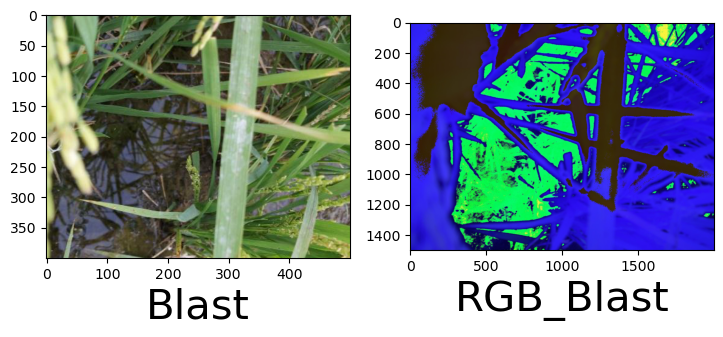

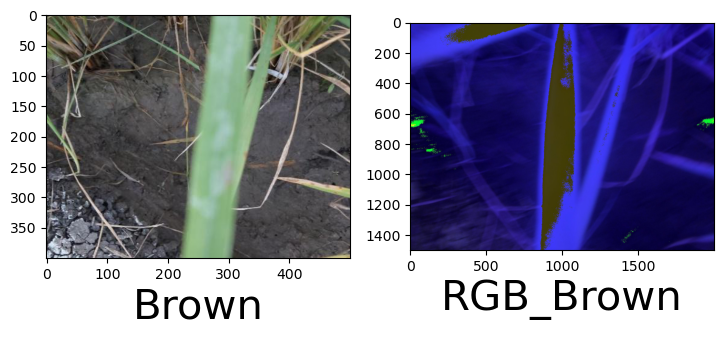

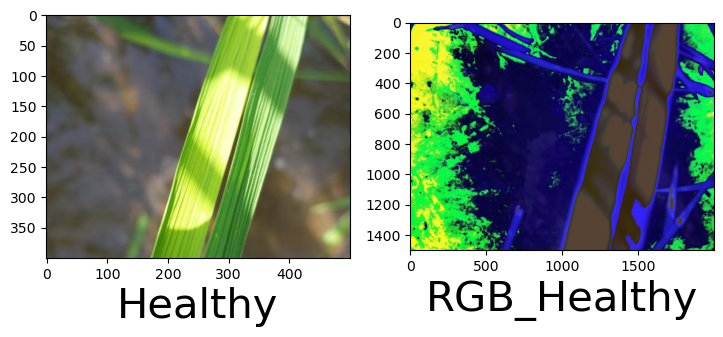

In [23]:
plt.figure(figsize=(18,15))
# Image 1
plt.subplot(2,4,2)   # 1 row and 3 columns
item = 'id_004wknd7qd.jpg'
path = 'C:/mges/Blast/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Blast', fontsize=30)

# Image 2
plt.subplot(2,4,3)   # 1 row and 3 columns
item = 'id_004wknd7qd_rgn.jpg'
path = 'C:/mges/Blast/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('RGB_Blast', fontsize=30)

plt.figure(figsize=(18,15))
#image 3
plt.subplot(3,4,2)   # 1 row and 3 columns
item = 'id_0e0h5rmcrc.jpg'
path = 'C:/mges/Brown/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Brown', fontsize=30)
#image 4
plt.subplot(3,4,3)   # 1 row and 3 columns
item = 'id_0e0h5rmcrc_rgn.jpg'
path = 'C:/mges/Brown/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('RGB_Brown', fontsize=30)

plt.figure(figsize=(18,15))
#Image 5
plt.subplot(4,4,2)   # 1 row and 3 columns
item = 'id_7fzvzd3pu7.jpg'
path = 'C:/mges/Healthy/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('Healthy', fontsize=30)
 
#image 6    
plt.subplot(4,4,3)   # 1 row and 3 columns
item = 'id_7fzvzd3pu7_rgn.jpg'
path = 'C:/mges/Healthy/' + item
image = plt.imread(path)
plt.imshow(image)
plt.xlabel('RGB_Healthy', fontsize=30)

## Set up Augmentation

In [24]:
import albumentations as albu


def augment_image(augmentation, image):
    # get the transform as a dict
    aug_image_dict =  augmentation(image=image)
    # retrieve the augmented matrix of the image
    image_matrix = aug_image_dict['image']
    
    
    return image_matrix

In [25]:
# Define the transforms

aug_types = albu.Compose([
            albu.HorizontalFlip(),
             albu.OneOf([
                albu.HorizontalFlip(),
                albu.VerticalFlip(),
                ], p=0.8),
            albu.OneOf([
                albu.RandomContrast(),
                albu.RandomGamma(),
                albu.RandomBrightness(),
                ], p=0.3),
            albu.OneOf([
                albu.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
                albu.GridDistortion(),
                albu.OpticalDistortion(distort_limit=2, shift_limit=0.5),
                ], p=0.3),
            albu.ShiftScaleRotate()
            ])

C:\Users\ghost\AppData\Roaming\Python\Python39\site-packages\albumentations\augmentations\transforms.py:1175: FutureWarning: RandomContrast has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(
C:\Users\ghost\AppData\Roaming\Python\Python39\site-packages\albumentations\augmentations\transforms.py:1149: FutureWarning: This class has been deprecated. Please use RandomBrightnessContrast
  warnings.warn(


In [26]:
# Create a new directory
image_dir = 'image_dir'
os.mkdir(image_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'image_dir'

In [27]:
Blast_list = \
os.listdir('C:/mges/Blast')
Brown_list = \
os.listdir('C:/mges/Brown')
bacterial_leaf_blight_list = \
os.listdir('C:/mges/Healthy')


# Transfer the leaf_smut images
for fname in Blast_list:
    
    path = 'C:/mges/Blast/'
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)
    
    
    
    
# Transfer the brown_spot images
for fname in Brown_list:
    
    path = 'C:/mges/Brown/'
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)
    
    
    
    
# Transfer the bacterial_leaf_blight images
for fname in Healthy_list:
    
    path = 'C:/mges/Healthy/'
    
    # source path to image
    src = os.path.join(path, fname)
    # destination path to image
    dst = os.path.join(image_dir, fname)
    # copy the image from the source to the destination
    shutil.copyfile(src, dst)
       

In [28]:
len(os.listdir('image_dir'))

5340

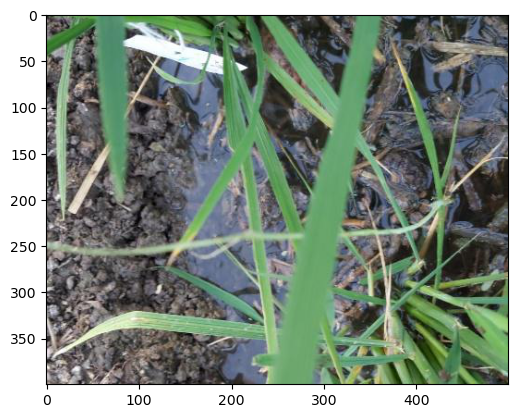

In [29]:
path = 'image_dir/'
image_list = os.listdir('image_dir')

fname = image_list[4]
image_path = path + fname

image = plt.imread(image_path)
plt.imshow(image)

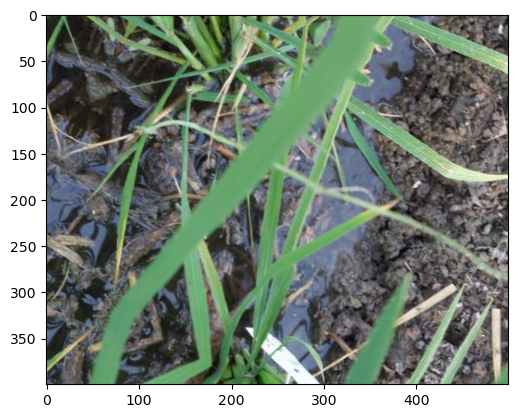

In [32]:
# Test the transformation setup.
# The image will be different each time this cell is run.

aug_image = augment_image(aug_types, image)

plt.imshow(aug_image)

## Prepare for Building Model

In [33]:
import tensorflow as tf
data = tf.keras.utils.image_dataset_from_directory('C:\mges')
data.class_names

Found 5340 files belonging to 4 classes.


['Blast', 'Brown', 'Healthy', 'data']

In [34]:
data_iterator = data.as_numpy_iterator()

In [35]:
#get a batch from the iterator
batch = data_iterator.next()
batch

(array([[[[ 49.992188 ,  33.783936 , 221.75488  ],
          [ 52.703857 ,  32.765137 , 212.0503   ],
          [ 54.400635 ,  32.496582 , 202.90186  ],
          ...,
          [ 39.43042  ,  43.24292  , 141.83105  ],
          [ 31.834473 , 166.74487  , 111.8562   ],
          [ 13.317627 , 206.96631  ,  95.16504  ]],
 
         [[ 50.406006 ,  30.984375 , 254.53027  ],
          [ 46.821045 ,  26.860107 , 150.2771   ],
          [ 55.46216  ,  32.15088  , 200.39185  ],
          ...,
          [ 16.036621 ,   6.1381836, 136.72656  ],
          [ 36.89966  , 173.75562  , 125.34985  ],
          [ 25.089111 ,  79.07568  , 102.299805 ]],
 
         [[ 49.148438 ,  34.665283 , 245.44824  ],
          [ 49.664062 ,  33.25537  , 247.68823  ],
          [ 53.090576 ,  38.20459  , 229.51245  ],
          ...,
          [ 28.685791 ,   7.86084  , 164.92798  ],
          [ 28.923096 ,  15.326904 , 134.6731   ],
          [  3.0336914,  55.319824 ,  96.331055 ]],
 
         ...,
 
         [[ 

In [36]:
data = data.map(lambda x,y :(x/255,y))

In [37]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [38]:
train = data.take(train_size)
val   = data.skip(train_size).take(val_size)
test = data.skip(train_size).skip(val_size).take(test_size)

In [39]:
len(train)+len(val)+len(test)

167

# Model Architecture

In [40]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import *

In [41]:
data_augmentation = keras.Sequential(
  [
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(256, 
                                                              256,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [42]:
model = keras.models.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(256, 
                                                              256,
                                                              3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1),
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
 keras.layers.BatchNormalization(),
 keras.layers.Dense(10, activation="softmax")
])

In [43]:
model.compile(optimizer='adam',loss=tf.losses.sparse_categorical_crossentropy,metrics=['accuracy']) 

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 256, 256, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 256, 256, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 256, 256, 3)       0         
                                                                 
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 batch_normalization (BatchN  (None, 196608)           786432    
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 300)              

In [45]:
logdir = 'C:\mges\data'

In [46]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist= model.fit(train,validation_data=val,epochs=10,callbacks=[tensorboard_callback])

Epoch 1/10
 45/133 [=========>....................] - ETA: 2:34 - loss: 2.3337 - accuracy: 0.3903

In [160]:
hist.history

{'loss': [1.9052611589431763,
  1.106244444847107,
  0.9423860907554626,
  0.8953245282173157,
  0.8826019763946533,
  0.8715340495109558,
  0.8616357445716858,
  0.8633324503898621,
  0.8520785570144653,
  0.8597033023834229],
 'accuracy': [0.5091635584831238,
  0.5953947305679321,
  0.5991541147232056,
  0.6104323267936707,
  0.6104323267936707,
  0.6116071343421936,
  0.6228853464126587,
  0.6156014800071716,
  0.6184210777282715,
  0.61654132604599],
 'val_loss': [1.4045720100402832,
  0.996726393699646,
  0.8683167695999146,
  0.8568525314331055,
  0.8727951645851135,
  0.8536973595619202,
  0.8410906195640564,
  0.8340299725532532,
  0.8765631914138794,
  0.8391485214233398],
 'val_accuracy': [0.4782196879386902,
  0.5804924368858337,
  0.6212121248245239,
  0.6193181872367859,
  0.6212121248245239,
  0.6193181872367859,
  0.6259469985961914,
  0.6221590638160706,
  0.6098484992980957,
  0.6401515007019043]}

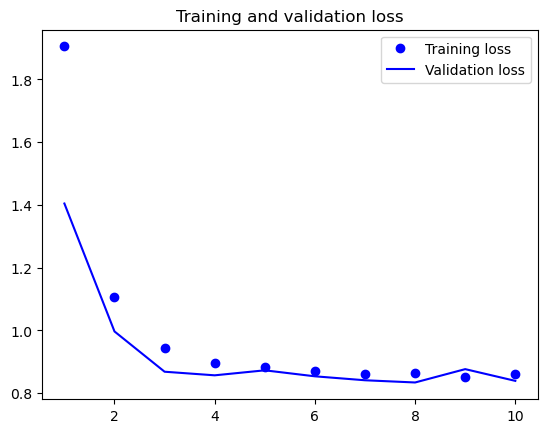

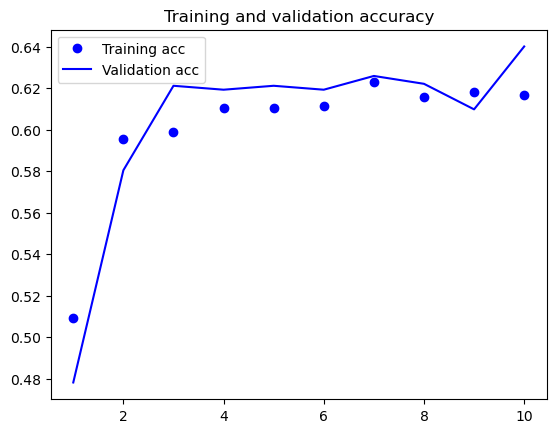

<Figure size 640x480 with 0 Axes>

In [162]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.show()

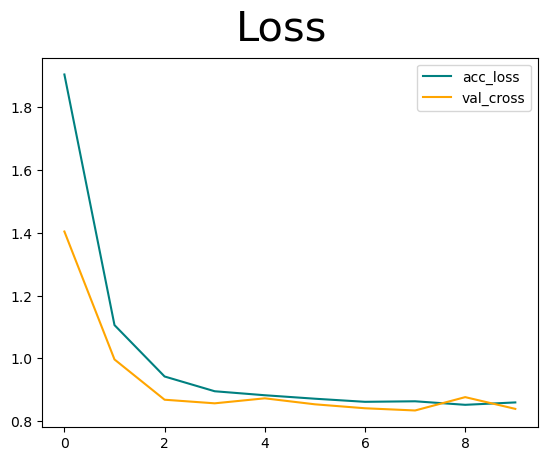

In [163]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='acc_loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_cross')
fig.suptitle('Loss',fontsize=30)
plt.legend(loc="upper right")
plt.show()

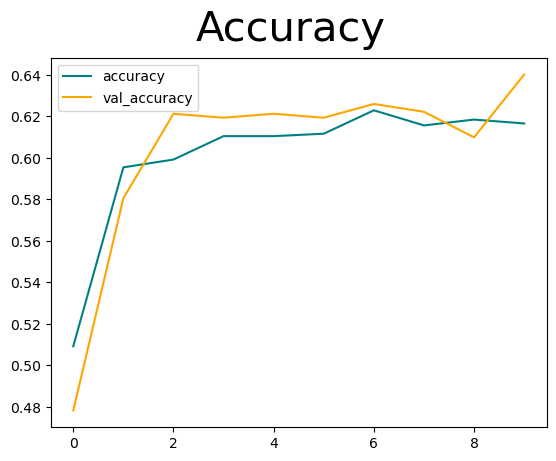

In [164]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=30)
plt.legend(loc="upper left")
plt.show()

In [181]:
from tensorflow.keras.metrics import Precision,Recall

In [182]:
pre = Precision()
re = Recall()

In [185]:
preds = model.predict_generator(test, steps=len(df_val), verbose=1)

C:\Users\ghost\AppData\Local\Temp\ipykernel_10384\1286152621.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  preds = model.predict_generator(test, steps=len(df_val), verbose=1)


4825/4825 [==============================] - 25s 9us/step 


In [186]:
y_pred = np.argmax(preds, axis=1)

y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0], dtype=int64)

In [201]:
cols = ['target_Blast', 'target_Brown', 'target_Healthy']
y_true = df_val[cols]
y_true = np.asarray(y_true) 

y_true = np.argmax(y_true, axis=1)

y_true


array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [200]:
print(y_pred)
print(y_true[0:28])

[0 0 0 1 0 0 0 1 2 0 2 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0]
[0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 2 2 1 0 0 1 1 0 0 1 1 0 0]


In [189]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [196]:
from sklearn.metrics import confusion_matrix
import itertools

cm = confusion_matrix(y_true[0:28], y_pred)

Confusion matrix, without normalization
[[11  4  1]
 [ 6  3  1]
 [ 2  0  0]]


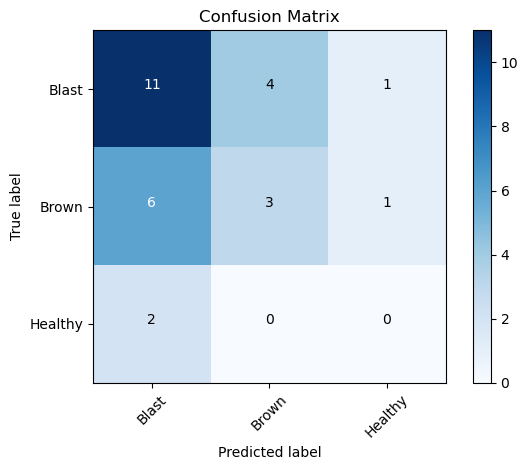

In [197]:

cm_plot_labels = ['Blast', 'Brown', 'Healthy']

plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')